## Introduction

In this project, we'll train, test, and improve a few different deep neural networks for image classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

%matplotlib inline

## Working with Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The `load_digits()` function returns [a copy of the hand-written digits dataset from UCI](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [2]:
digits = load_digits()

type(digits)

sklearn.datasets.base.Bunch

In [3]:
digits.keys()

dict_keys(['DESCR', 'target_names', 'images', 'data', 'target'])

In [4]:
labels = pd.Series(digits['target'])
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [5]:
digits_df = pd.DataFrame(digits['data'])
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


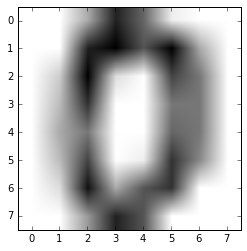

In [6]:
first_image = digits_df.iloc[0]
#first_image = first_image.drop('label', axis=1)
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

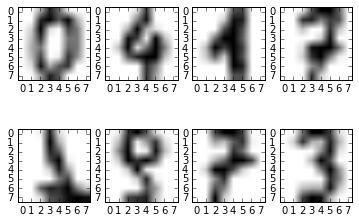

In [7]:
fig, axes = plt.subplots(2, 4)
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 = axes.flatten()

digit =[0, 100, 200, 300, 1000, 1100, 1200, 1300]

ax1.imshow(digits_df.iloc[0].values.reshape(8, 8), cmap = 'gray_r')
ax2.imshow(digits_df.iloc[100].values.reshape(8, 8), cmap = 'gray_r')
ax3.imshow(digits_df.iloc[200].values.reshape(8, 8), cmap = 'gray_r')
ax4.imshow(digits_df.iloc[300].values.reshape(8, 8), cmap = 'gray_r')

ax5.imshow(digits_df.iloc[1000].values.reshape(8, 8), cmap = 'gray_r')
ax6.imshow(digits_df.iloc[1100].values.reshape(8, 8), cmap = 'gray_r')
ax7.imshow(digits_df.iloc[1200].values.reshape(8, 8), cmap = 'gray_r')
ax8.imshow(digits_df.iloc[1300].values.reshape(8, 8), cmap = 'gray_r')

## K-Nearest Neighbors Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(neighbors, all_X, all_y):
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    knn.fit(all_X, all_y)
    return knn

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    target_df = pd.DataFrame()
    target_df['predictions'] = predictions
    target_df['target'] = test_target
    accuracy = sum(target_df['predictions'] == target_df['target']) / len(predictions)
    return accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(digits_df):
        train_features, test_features  = digits_df.loc[train_index], digits_df.loc[test_index]
        train_target, test_target = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_target)
        accuracy = test(model,test_features, test_target)
        fold_accuracies.append(accuracy)
    return fold_accuracies    

[0.24222222222222223, 0.2411111111111111, 0.23944444444444443, 0.23833333333333334, 0.23722222222222222, 0.23666666666666666, 0.23555555555555555, 0.2361111111111111, 0.23333333333333334, 0.23333333333333334]


<function matplotlib.pyplot.show>

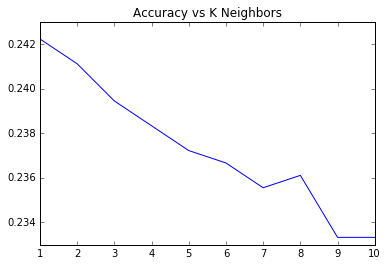

In [9]:
k_list = list(range(1,11))
cross_val = []
for k in k_list:
    cv = cross_validate(k)
    cv_mean = np.mean(cv)
    cross_val.append(cv_mean)
print(cross_val)
plt.plot(k_list, cross_val)
plt.title('Accuracy vs K Neighbors')
plt.show

## Neural Network with 1 Hidden Layer

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore.

Let's now try a neural network with a single hidden layer.

In [10]:
from sklearn.neural_network import MLPClassifier

def train(neurons, train_features, train_target):
    nn = MLPClassifier(hidden_layer_sizes = neurons)
    nn.fit(train_features, train_target)
    return nn

def test(model, test_features, test_target):
    predictions = model.predict(test_features)
    test_df = pd.DataFrame()
    test_df['predictions'] = predictions
    test_df['target'] = test_target
    accuracy = sum(test_df['predictions'] == test_df['target']) / len(test_df)
    return accuracy

def cross_validate(n):
    neuron_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(digits_df):
        train_features, test_features = digits_df.loc[train_index], digits_df.loc[test_index]
        train_target, test_target = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        neuron_accuracies.append(accuracy)
    return neuron_accuracies

In [11]:
neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
#
n_accuracies = []
for n in neurons:
    n_accuracy = cross_validate(n)
    na_mean = np.mean(n_accuracy)
    n_accuracies.append(na_mean)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



In [12]:
n_accuracies

[0.18777777777777777,
 0.22777777777777777,
 0.23222222222222222,
 0.235,
 0.23444444444444446,
 0.24166666666666667]

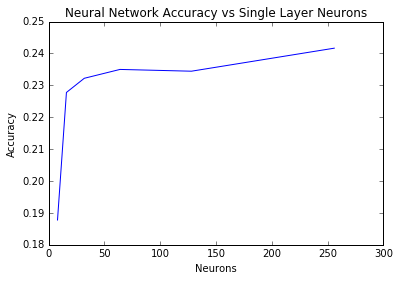

In [13]:
plt.plot(neurons, n_accuracies)
plt.title('Neural Network Accuracy vs Single Layer Neurons')
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.show()

There was a increase in accuracy from 0.2 to 0.241 when we increased the number of neurons from 8 to 256. 
However, K-nearest neighbors achieved over 0.242 and seems to better than single layer neural networks.

## Neural Network with 2 Hidden Layers

In [16]:
two_layer_neurons = [(64, 64), (128, 128), (256, 256)]
two_layer_accuracies = []
for n in two_layer_neurons:
    two_layer_accuracies.append(np.mean(cross_validate(n)))
    
two_layer_accuracies

[0.2388888888888889, 0.2411111111111111, 0.2411111111111111]

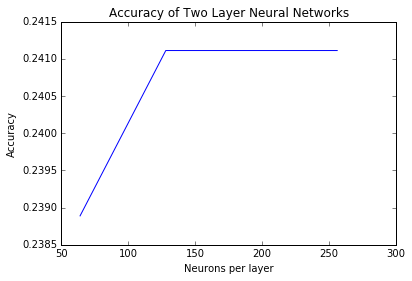

In [18]:
x = [i[0] for i in two_layer_neurons]
plt.plot(x, two_layer_accuracies)
plt.title('Accuracy of Two Layer Neural Networks')
plt.xlabel('Neurons per layer')
plt.ylabel('Accuracy')
plt.show()

There wasn't any improve on 2 hidden layers neural network, though if there were any improve it would most likely be minimum.

## Neural Network with 3 Hidden Layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, we will increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [24]:
def cross_validate(n):
    n_accuracies = []
    kf = KFold(n_splits = 6, random_state = 2)
    for train_index, test_index in kf.split(digits_df):
        train_features, test_features = digits_df.loc[train_index], digits_df.loc[test_index]
        train_target, test_target = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_target)
        accuracy = test(model, test_features, test_target)
        n_accuracies.append(accuracy)
    return n_accuracies

In [25]:
three_layer_neurons = [(8, 8, 8), (64, 64, 64), (128, 128, 128)]
three_layer_accuracies = []
for n in three_layer_neurons:
    three_layer_accuracies.append(np.mean(cross_validate(n)))
    
three_layer_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.14333333333333334, 0.15555555555555556, 0.15944444444444444]

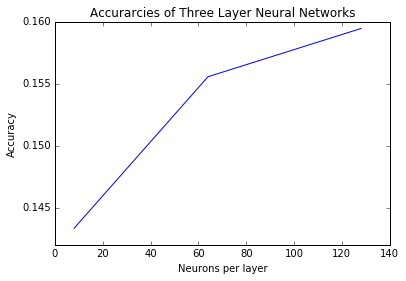

In [26]:
x = [i[0] for i in three_layer_neurons]
plt.plot(x, three_layer_accuracies)
plt.xlabel('Neurons per layer')
plt.title('Accurarcies of Three Layer Neural Networks')
plt.ylabel('Accuracy')
plt.show()

This shows that the previous models were experiencing overfitting and with 3 layers of neurons and 6 fold cross validaton, the accuracy has lower but variance has decreased.